<a href="https://colab.research.google.com/github/karank85/speech-recognition/blob/main/Project_2_Speech_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os

import numpy as np
from numpy import ndarray
import pandas as pd

import librosa

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
from tqdm import tqdm

In [10]:
librosa.__version__

'0.10.1'

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
SPEECH_FILE = "/content/drive/MyDrive/datasets/198/19-198-0000.flac"
# SPEECH_FILE = "/content/drive/MyDrive/198/19-198-0000.flac"


ipd.Audio(SPEECH_FILE)


In [13]:
import requests
TEXT_FILE = "/content/drive/MyDrive/datasets/198/19-198.trans.txt"
# TEXT_FILE = "/content/drive/MyDrive/198/19-198.trans.txt"

audio_dict = dict()

with open(TEXT_FILE, "r") as file:
  lines = file.read().split("\n")
  for line in lines:
    splitter = line.split(" ")
    file_name = splitter[0]
    file_content = ' '.join(splitter[1:])
    audio_dict[file_name] = file_content

audio_dict

{'19-198-0000': 'NORTHANGER ABBEY',
 '19-198-0001': 'THIS LITTLE WORK WAS FINISHED IN THE YEAR EIGHTEEN O THREE AND INTENDED FOR IMMEDIATE PUBLICATION IT WAS DISPOSED OF TO A BOOKSELLER IT WAS EVEN ADVERTISED',
 '19-198-0002': 'NEITHER THE AUTHOR NOR THE PUBLIC HAVE ANY OTHER CONCERN THAN AS SOME OBSERVATION IS NECESSARY UPON THOSE PARTS OF THE WORK WHICH THIRTEEN YEARS HAVE MADE COMPARATIVELY OBSOLETE',
 '19-198-0003': 'THE PUBLIC ARE ENTREATED TO BEAR IN MIND THAT THIRTEEN YEARS HAVE PASSED SINCE IT WAS FINISHED MANY MORE SINCE IT WAS BEGUN AND THAT DURING THAT PERIOD PLACES MANNERS BOOKS AND OPINIONS HAVE UNDERGONE CONSIDERABLE CHANGES',
 '19-198-0004': 'CHAPTER ONE NO ONE WHO HAD EVER SEEN CATHERINE MORLAND IN HER INFANCY WOULD HAVE SUPPOSED HER BORN TO BE AN HEROINE HER SITUATION IN LIFE',
 '19-198-0005': 'THE CHARACTER OF HER FATHER AND MOTHER HER OWN PERSON AND DISPOSITION WERE ALL EQUALLY AGAINST HER HER FATHER WAS A CLERGYMAN WITHOUT BEING NEGLECTED OR POOR AND A VERY RESPECTA

In [24]:
import glob


data_dict = {
    "file_path": [],
    "speech_text": []
}

# path = '/content/drive/MyDrive/198/*.flac'
path = '/content/drive/MyDrive/datasets/198/*.flac'

flac_files = glob.glob(path)

for file_name in flac_files:
    base_name = os.path.basename(file_name).split(".")[0]
    data_dict["file_path"].append(file_name)
    data_dict["speech_text"].append(audio_dict[base_name])


df = pd.DataFrame(data_dict)
df.head()

,file_path,speech_text
0,/content/drive/MyDrive/datasets/198/19-198-000...,NORTHANGER ABBEY
1,/content/drive/MyDrive/datasets/198/19-198-000...,THIS LITTLE WORK WAS FINISHED IN THE YEAR EIGH...
2,/content/drive/MyDrive/datasets/198/19-198-000...,HER MOTHER WAS A WOMAN OF USEFUL PLAIN SENSE W...
3,/content/drive/MyDrive/datasets/198/19-198-002...,THAT THE POOR BEETLE WHICH WE TREAD UPON IN CO...
4,/content/drive/MyDrive/datasets/198/19-198-003...,SHE MUST SEEK THEM ABROAD INVITED HER TO GO WI...


### Visualizing Audio

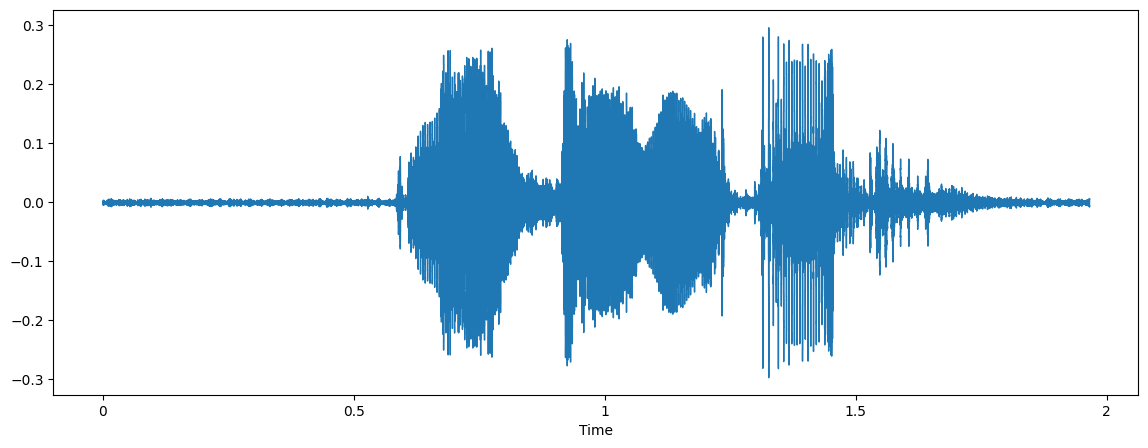

In [19]:
plt.figure(figsize=(14,5))
x,sr = librosa.load(SPEECH_FILE)
librosa.display.waveshow(x, sr=sr)

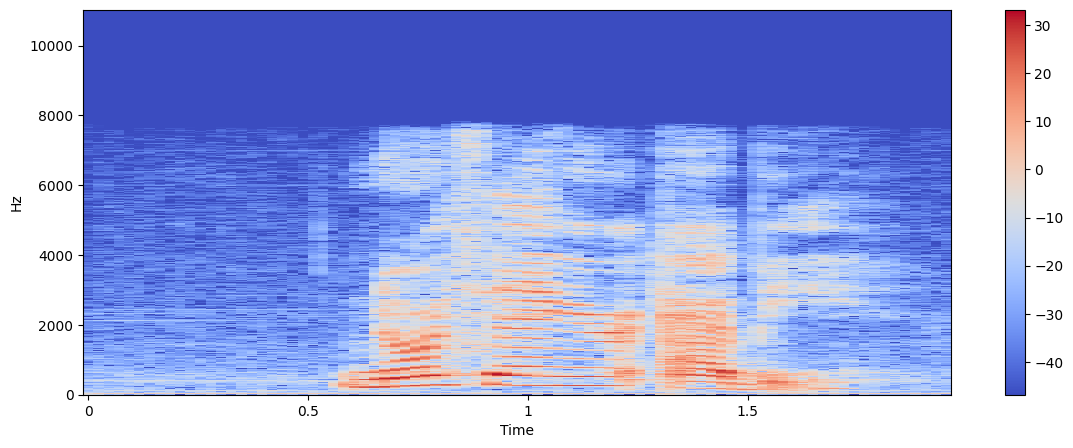

In [18]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()